CNN initialization

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
import numpy as np
import logging
# from keras.models import Sequential
# from keras.layers import Conv2D
# from keras.layers import Dense
# from keras.layers import Flatten

tf.get_logger().setLevel(logging.ERROR)

EPOCHS = 128
BATCH_SIZE = 32

cifar_dataset = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar_dataset.load_data()

mean = np.mean(train_images)
stddev = np.std(train_images)
train_images = (train_images - mean) / stddev
test_images = (test_images - mean) / stddev
print('mean: ', mean)
print('stddev: ', stddev)

train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)



mean:  120.70756512369792
stddev:  64.1500758911213


建構ＣＮＮ模型

In [5]:
model = Sequential()

model.add(Conv2D(64, (5, 5), strides=(2, 2),
                 activation='relu', padding='same',
                 input_shape=(32,32,3),
                 kernel_initializer='he_normal',
                 bias_initializer='zeros'))
model.add(Conv2D(64, (3, 3), strides=(2, 2),
                 activation='relu', padding='same',
                 kernel_initializer='he_normal',
                 bias_initializer='zeros'))
model.add(Flatten())
model.add(Dense(10, activation='softmax',
                kernel_initializer='glorot_uniform',
                bias_initializer='zeros'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])
model.summary()


2024-05-02 11:20:02.927422: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 64)        4864      
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 10)                40970     
                                                                 
Total params: 82,762
Trainable params: 82,762
Non-trainable params: 0
_________________________________________________________________


訓練模型

In [6]:
history = model.fit(
    train_images, train_labels,
    validation_data=(test_images, test_labels),
    epochs=EPOCHS, batch_size=BATCH_SIZE,
    verbose=2, shuffle=True
)

Epoch 1/128
1563/1563 - 18s - loss: 1.3976 - accuracy: 0.5081 - val_loss: 1.2140 - val_accuracy: 0.5750 - 18s/epoch - 12ms/step
Epoch 2/128
1563/1563 - 18s - loss: 1.0484 - accuracy: 0.6358 - val_loss: 1.0859 - val_accuracy: 0.6207 - 18s/epoch - 11ms/step
Epoch 3/128
1563/1563 - 18s - loss: 0.9120 - accuracy: 0.6819 - val_loss: 1.0249 - val_accuracy: 0.6509 - 18s/epoch - 11ms/step
Epoch 4/128
1563/1563 - 18s - loss: 0.8127 - accuracy: 0.7191 - val_loss: 1.0473 - val_accuracy: 0.6461 - 18s/epoch - 11ms/step
Epoch 5/128
1563/1563 - 17s - loss: 0.7346 - accuracy: 0.7445 - val_loss: 1.0531 - val_accuracy: 0.6547 - 17s/epoch - 11ms/step
Epoch 6/128
1563/1563 - 17s - loss: 0.6673 - accuracy: 0.7667 - val_loss: 1.1035 - val_accuracy: 0.6489 - 17s/epoch - 11ms/step
Epoch 7/128
1563/1563 - 17s - loss: 0.6055 - accuracy: 0.7887 - val_loss: 1.1159 - val_accuracy: 0.6570 - 17s/epoch - 11ms/step
Epoch 8/128
1563/1563 - 17s - loss: 0.5537 - accuracy: 0.8046 - val_loss: 1.1995 - val_accuracy: 0.6423 

繪製結果

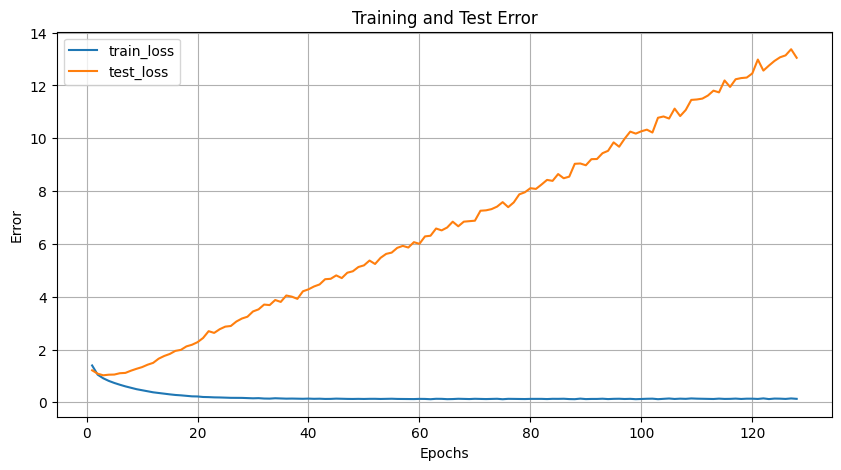

In [17]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, EPOCHS + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs_range, train_loss, label='train_loss')
plt.plot(epochs_range, val_loss, label='test_loss')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Training and Test Error')
plt.legend()
plt.grid()
plt.show()




改善模型

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPooling2D
import numpy as np
import logging
tf.get_logger().setLevel(logging.ERROR)

EPOCHS = 128
BATCH_SIZE = 32

# 載入資料集
cifar_dataset = keras.datasets.cifar10
(train_images, train_labels), (test_images,
                    test_labels) = cifar_dataset.load_data()

# 資料標準化
mean = np.mean(train_images)
stddev = np.std(train_images)
train_images = (train_images - mean) / stddev
test_images = (test_images - mean) / stddev
print('mean: ', mean)
print('stddev: ', stddev)

# 替正解做 one-hot 編碼
train_labels = to_categorical(train_labels,
                              num_classes=10)
test_labels = to_categorical(test_labels,
                             num_classes=10)

model = Sequential()
model.add(Conv2D(64, (4, 4), activation='relu', padding='same',
                 input_shape=(32, 32, 3)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (2, 2), activation='relu', padding='same',
                 strides=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# 模型編譯、訓練
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics =['accuracy'])
model.summary()
history = model.fit(
    train_images, train_labels, validation_data =
    (test_images, test_labels), epochs=EPOCHS,
    batch_size=BATCH_SIZE, verbose=2, shuffle=True)



2024-05-24 11:36:55.067626: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


mean:  120.70756512369792
stddev:  64.1500758911213


2024-05-24 11:37:02.678124: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        3136      
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        16448     
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 dropout_2 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9